In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('techstate_mssa2_new.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
print(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31195332 entries, 0 to 31195331
Data columns (total 32 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   reg_time       object
 1   cmd            int64 
 2   fpo_work_mode  int64 
 3   state0         int64 
 4   state1         int64 
 5   state2         int64 
 6   state3         int64 
 7   state4         int64 
 8   state5         int64 
 9   data0          int64 
 10  data1          int64 
 11  data2          int64 
 12  data3          int64 
 13  data4          int64 
 14  data5          int64 
 15  regimes        object
 16  is_rab         int64 
 17  is_rez         int64 
 18  is_rem         int64 
 19  is_reg         int64 
 20  is_ispr        int64 
 21  is_neispr      int64 
 22  is_otkaz       int64 
 23  is_zavisim     int64 
 24  is_vkl         int64 
 25  is_vkl2        int64 
 26  is_trig        int64 
 27  is_trba        int64 
 28  is_vedushciy   int64 
 29  is_mu          int64 
 30  is_blokirovka  i

,reg_time,cmd,fpo_work_mode,state0,state1,state2,state3,state4,state5,data0,...,is_otkaz,is_zavisim,is_vkl,is_vkl2,is_trig,is_trba,is_vedushciy,is_mu,is_blokirovka,element_name
0,2020-10-20 12:42:29.226324,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Noname
1,2020-10-20 12:42:29.226324,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Noname
2,2020-10-20 12:42:29.226324,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Noname
3,2020-10-20 12:42:29.226324,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Noname
4,2020-10-20 12:42:29.226335,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Noname


Определим все возможные блоки, о которых есть хотя бы одна запись. Сформируем дерево этих блоков. Определим конечные блоки ("листья" дерева блоков)

In [3]:
# Create a tree of element names
element_names = dict()
iterator = df['element_name']
for name in iterator:
    path = name.split('/')[1:]
    curr_node = element_names
    for node in path:
        if not curr_node.get(node, False):
            curr_node[node] = dict()
        curr_node = curr_node[node]
        
# Create a dict of leaf nodes
def find_leafs(item, leaf_nodes):
    if len(item[1].keys())==0:
        leaf_nodes[item[0]] = leaf_nodes.get(item[0],0) + 1
        return
    for new_item in item[1].items():
        find_leafs(new_item, leaf_nodes)
leaf_nodes = dict()
find_leafs(('',element_names),leaf_nodes)

#print(iterator)
print(element_names)
print(leaf_nodes.keys())

{'ИЗД': {'ДР': {'ДРУ': {'ДРУ1': {'ДБ-101_2': {'ДЯ-101': {'7ДЯ-101 ФПО': {}, 'ППО DD26': {}, 'ППО DD30': {}, 'Модуль ФПО3': {}, 'Мод вх FтО': {}, 'Мод вх FтР': {}, 'Мод вх FдО': {}, 'Мод вх FдР': {}}}, 'ДБ-101_1': {'ДЯ-101': {'7ДЯ-101 ФПО': {}, 'ППО DD26': {}, 'ППО DD30': {}, 'Модуль ФПО3': {}, 'Мод вх FтО': {}, 'Мод вх FтР': {}, 'Мод вх FдО': {}, 'Мод вх FдР': {}}}}, 'МБ-232_1': {'МЯ-232': {'ФПОЯ_8МЯ-232': {}, 'Модуль ФПО3': {}}, 'МЯ-233': {'Мод ППО D1': {}, 'Мод ППО D10': {}, 'Мод ППО D19': {}, 'Мод ППО D28': {}, 'Мод ППО D37': {}}}, 'МБ-232_2': {'МЯ-232': {'ФПОЯ_8МЯ-232': {}, 'Модуль ФПО3': {}}, 'МЯ-233': {'Мод ППО D1': {}, 'Мод ППО D10': {}, 'Мод ППО D19': {}, 'Мод ППО D28': {}, 'Мод ППО D37': {}}}, 'ДБ-435': {'ФПО_ДБ-435': {}, 'Модуль ППО': {}, 'Мод ФПО3': {}}, 'ДБ-234': {'ДЯ-236': {'Модуль ФПО3': {}, 'Модуль ППО': {}, 'ФПО_9ДЯ-236': {}}}, 'ДБ-127_1': {'ФПО_ДБ-127': {}, 'Мод ФПО3': {}, 'Модуль ППО': {}}, 'ДБ-127_2': {'ФПО_ДБ-127': {}, 'Мод ФПО3': {}, 'Модуль ППО': {}}, 'ДБ-434_1': 

In [77]:
print(len(leaf_nodes))

519


In [78]:
arr = df[['cmd']].to_numpy()
vals, counts = np.unique(arr, return_counts=True)
print(vals)
print(counts)
print(counts / np.sum(counts) * 100.0)
print(np.sum(counts[2:]) / np.sum(counts) * 100.0)

[   0    1    2    4   33   42   73   81   82  111  112 1045 2069 4117
 8213]
[11803556 19166322       46       40       51   175142        5     3832
     4105       18       54    23738    18159       42      222]
[3.78375713e+01 6.14397116e+01 1.47457959e-04 1.28224313e-04
 1.63485998e-04 5.61436564e-01 1.60280391e-05 1.22838891e-02
 1.31590201e-02 5.77009406e-05 1.73102822e-04 7.60947183e-02
 5.82106323e-02 1.34635528e-04 7.11644935e-04]
0.7227171039564508


Распарсим поле данных state

In [4]:
def reverse_order(original, nbits):
    return sum(1<<(nbits-1-i) for i in range(nbits) if original>>i & 1)

data = df.copy()

# reverse bits order of all 'state' fields
for i in range(6):
    col_name = 'state{}'.format(i)
    data[col_name] = list(map(reverse_order, data[col_name], [8]*len(data[col_name])))
    
# create the whole 'state' field
data['state'] = data['state5'] + data['state4']*256 + data['state3']*(256**2) + data['state2']*(256**3) + data['state1']*(256**4) + data['state0']*(256**5)

# divide by subsystems
for i in range(16):
    data['subsystem{}'.format(i+1)] = [x >> 3*(15-i) & 0b111 for x in data['state']]
    
# reverse bits order of all 'subsystem' fields
condition_codes = {0:'absent', 1:'ispr', 2:'neispr', 3:'zav_neispr', 4:'otkaz', 5:'zav_otkaz', 6:'none', 7:'none'}
for i in range(16):
    col_name = 'subsystem{}'.format(i+1)
    data[col_name] = list(map(reverse_order, data[col_name], [3]*len(data[col_name])))
    data[col_name] = [condition_codes[x] for x in data[col_name]]
    
data

,reg_time,cmd,fpo_work_mode,state0,state1,state2,state3,state4,state5,data0,...,subsystem7,subsystem8,subsystem9,subsystem10,subsystem11,subsystem12,subsystem13,subsystem14,subsystem15,subsystem16
0,2020-10-20 12:42:29.226324,1,0,0,0,0,0,0,0,0,...,absent,absent,absent,absent,absent,absent,absent,absent,absent,absent
1,2020-10-20 12:42:29.226324,1,0,0,0,0,0,0,0,0,...,absent,absent,absent,absent,absent,absent,absent,absent,absent,absent
2,2020-10-20 12:42:29.226324,1,0,0,0,0,0,0,0,0,...,absent,absent,absent,absent,absent,absent,absent,absent,absent,absent
3,2020-10-20 12:42:29.226324,1,0,0,0,0,0,0,0,0,...,absent,absent,absent,absent,absent,absent,absent,absent,absent,absent
4,2020-10-20 12:42:29.226335,1,0,0,0,0,0,0,0,0,...,absent,absent,absent,absent,absent,absent,absent,absent,absent,absent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31195327,2020-11-13 13:30:16.980473,1,2,0,0,0,0,0,0,0,...,absent,absent,absent,absent,absent,absent,absent,absent,absent,absent
31195328,2020-11-13 13:30:16.980473,1,2,0,0,0,0,0,0,0,...,absent,absent,absent,absent,absent,absent,absent,absent,absent,absent
31195329,2020-11-13 13:30:16.980473,1,2,0,0,0,0,0,0,0,...,absent,absent,absent,absent,absent,absent,absent,absent,absent,absent
31195330,2020-11-13 13:30:16.980473,1,2,0,0,0,0,0,0,0,...,absent,absent,absent,absent,absent,absent,absent,absent,absent,absent


In [5]:
data.columns

Index(['reg_time', 'cmd', 'fpo_work_mode', 'state0', 'state1', 'state2',
       'state3', 'state4', 'state5', 'data0', 'data1', 'data2', 'data3',
       'data4', 'data5', 'regimes', 'is_rab', 'is_rez', 'is_rem', 'is_reg',
       'is_ispr', 'is_neispr', 'is_otkaz', 'is_zavisim', 'is_vkl', 'is_vkl2',
       'is_trig', 'is_trba', 'is_vedushciy', 'is_mu', 'is_blokirovka',
       'element_name', 'state', 'subsystem1', 'subsystem2', 'subsystem3',
       'subsystem4', 'subsystem5', 'subsystem6', 'subsystem7', 'subsystem8',
       'subsystem9', 'subsystem10', 'subsystem11', 'subsystem12',
       'subsystem13', 'subsystem14', 'subsystem15', 'subsystem16'],
      dtype='object')

In [6]:
# data.drop(axis=1, labels=['state0','state1','state2','state3','state4','state5','state'], inplace=True)

In [7]:
data['state']

0           0
1           0
2           0
3           0
4           0
           ..
31195327    0
31195328    0
31195329    0
31195330    0
31195331    0
Name: state, Length: 31195332, dtype: int64

In [10]:
# convert 'reg_time' from string to seconds (from 2020-04-15 00:00:00)
from datetime import datetime
def to_total_seconds(s):
    pos = s.find('.')
    if pos > 0:
        return (datetime.fromisoformat(s+'0'*(26-len(s))) - datetime(2020,10,20, 12, 42, 29)).total_seconds()
    else:
        return (datetime.fromisoformat(s+'.'+'0'*6) - datetime(2020,10,20, 12, 42, 29)).total_seconds()

data['reg_time'] = data['reg_time'].apply(to_total_seconds)

In [11]:
data['reg_time']

0           2.263240e-01
1           2.263240e-01
2           2.263240e-01
3           2.263240e-01
4           2.263350e-01
                ...     
31195327    2.076468e+06
31195328    2.076468e+06
31195329    2.076468e+06
31195330    2.076468e+06
31195331    2.076468e+06
Name: reg_time, Length: 31195332, dtype: float64

In [76]:
pd.set_option('display.max_rows', df.shape[0]+1)

data['element_name'].value_counts(sort=True, ascending=False)

Noname                                                             1291188
/ИЗД/ДР/ДРЦ_1/ДБ-435_4/ФПО_ДБ-435                                   277679
/ИЗД/ДР/ДРЦ_1/ДБ-435_3/ФПО_ДБ-435                                   261668
/ИЗД/ДР/ДРЦ_3/ДБ-435_2/ФПО_ДБ-435                                   260541
/ИЗД/ДР/ДРЦ_1/ДРЦ-кр/УУ-Кр-ДРЦ/Датч внутр темп/Тср                  243692
/ИЗД/ДР/ДРЦ_1/ДБ-435_1/ФПО_ДБ-435                                   231704
/ИЗД/ДР/ДРП_3/ДРП-кр/Щит А2/Контроль темп-р/Тср                     227301
/ИЗД/ДР/ДРЦ_2/ДРЦ-кр/УУ-Кр-ДРЦ/Датч внутр темп/Тср                  214870
/ИЗД/ДР/ДРП_1/ДРП-кр/Щит А2/Контроль темп-р/Тср                     212816
/ИЗД/ДР/ДРП_2/ДРП-кр/Щит А2/Контроль темп-р/Тср                     210740
/ИЗД/ДР/ДРЦ_3/ДБ-435_1/ФПО_ДБ-435                                   202020
/ИЗД/ДР/ДРЦ_1/ДРЦ-кр/УУ-Кр-ДРЦ/Датч темп/Темп нар возд              181496
/ИЗД/ДР/ДРЦ_2/ДРЦ-кр/УУ-Кр-ДРЦ/Датч УУ/УУ-Средняя                   156785
/ИЗД/ДР/ДРЦ_3/ДБ-435_4/ФП

Определим почасовую частоту записей для наиболее часто встречающихся блоков  

In [40]:
# compute entry frequencies (per hour) for first n_max elements
entry_frequencies = dict()
elements = data['element_name'].value_counts(sort=True, ascending=False).index
n_max = 10
if n_max > len(elements):
    n_max = len(elements)
for name in elements[:n_max]:
    freq = list()
    block = data[data['element_name']==name]
    for i in range(24*24+1):
        freq.append(len(block[(block['reg_time']>3600*i) & (block['reg_time']<=3600*(i+1))]))
    entry_frequencies[name] = freq

In [41]:
list(entry_frequencies.keys())

['Noname',
 '/ИЗД/ДР/ДРЦ_1/ДБ-435_4/ФПО_ДБ-435',
 '/ИЗД/ДР/ДРЦ_1/ДБ-435_3/ФПО_ДБ-435',
 '/ИЗД/ДР/ДРЦ_3/ДБ-435_2/ФПО_ДБ-435',
 '/ИЗД/ДР/ДРЦ_1/ДРЦ-кр/УУ-Кр-ДРЦ/Датч внутр темп/Тср',
 '/ИЗД/ДР/ДРЦ_1/ДБ-435_1/ФПО_ДБ-435',
 '/ИЗД/ДР/ДРП_3/ДРП-кр/Щит А2/Контроль темп-р/Тср',
 '/ИЗД/ДР/ДРЦ_2/ДРЦ-кр/УУ-Кр-ДРЦ/Датч внутр темп/Тср',
 '/ИЗД/ДР/ДРП_1/ДРП-кр/Щит А2/Контроль темп-р/Тср',
 '/ИЗД/ДР/ДРП_2/ДРП-кр/Щит А2/Контроль темп-р/Тср']

In [42]:
list(entry_frequencies.values())

[[3316,
  3237,
  3011,
  3288,
  3105,
  3130,
  3162,
  3091,
  3127,
  3126,
  3193,
  3257,
  3221,
  3209,
  3261,
  3338,
  3442,
  3290,
  3236,
  3291,
  3397,
  3601,
  3451,
  3590,
  3758,
  3419,
  3401,
  3430,
  3259,
  3316,
  3275,
  3256,
  3237,
  3251,
  3234,
  3276,
  3236,
  3264,
  3313,
  3438,
  3397,
  3200,
  3258,
  3297,
  3272,
  3256,
  3214,
  3302,
  3203,
  3146,
  653,
  1357,
  111,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1432,


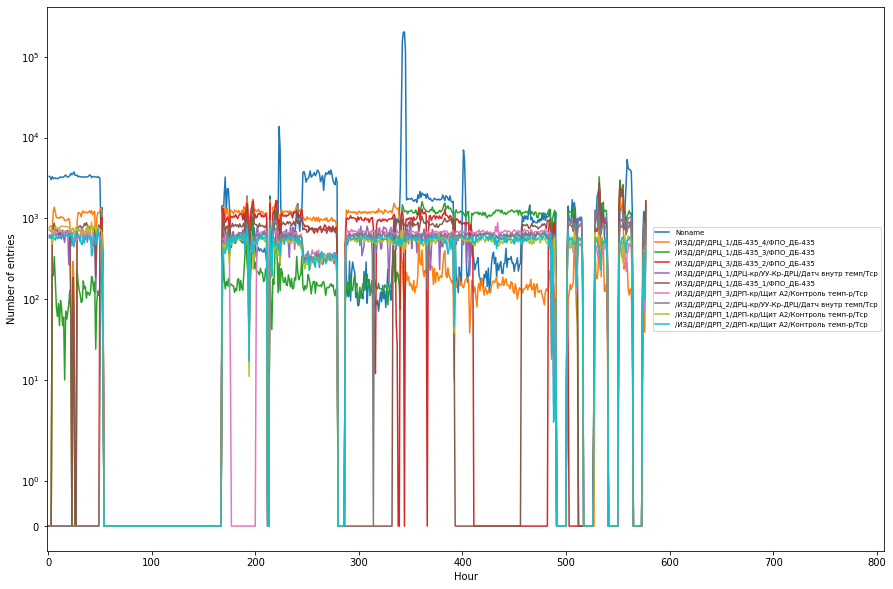

In [72]:
plt.figure(figsize=(15,10))
for name in entry_frequencies.keys():
    plt.plot(np.linspace(1,24*24+1,24*24+1), entry_frequencies[name], label=name)#, marker='o', linestyle='', markersize=5)
plt.legend(loc=5, prop={'size': 7})
plt.xlabel('Hour')
plt.ylabel('Number of entries')
plt.yscale("symlog")
plt.xlim(-1, (24*24+1)+230)
# plt.ylim(0,1000)
plt.show()

Вывод: частота записи информации о состоянии блоков изменяется хаотично в течение дня, однако характер этого изменения для всех блоков одинаков.

Посмотрим, как меняется во времени состояние той или иной подсистемы, а также общее состояние наиболее часто встречающегося блока.

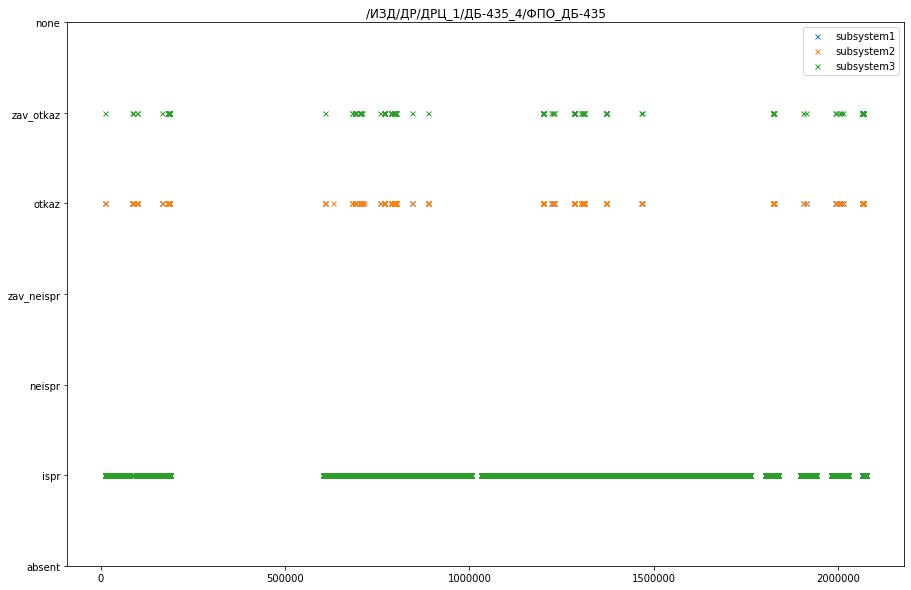

In [74]:
# let's follow the evolution of only the one block - the most frequent
name = '/ИЗД/ДР/ДРЦ_1/ДБ-435_4/ФПО_ДБ-435'
block = data[data['element_name']==name]

# available subsystems: 1,2,3,4,7,8,13,14 
params = ['subsystem1', 'subsystem2', 'subsystem3']#,'subsystem2','subsystem3','subsystem4','subsystem7','subsystem8','subsystem13','subsystem14']
codes_condition = {'absent':0.0, 'ispr':0.5, 'neispr':1.0, 'zav_neispr':1.5, 'otkaz':2.0, 'zav_otkaz':2.5, 'none':3.0}

plt.figure(figsize=(15,10))
for param in params:
    plt.plot(block['reg_time'], [codes_condition[x] for x in block[param]], label=param, marker='x', linestyle='', markersize=5)
#     plt.bar(block['reg_time'], [codes_condition[x] for x in block[param]], label=param)
plt.legend(loc='best')
plt.title(name)
plt.yticks(ticks=[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0], labels=['absent','ispr','neispr','zav_neispr','otkaz','zav_otkaz', 'none'])
#plt.xlim(20000, 40000)
plt.show()

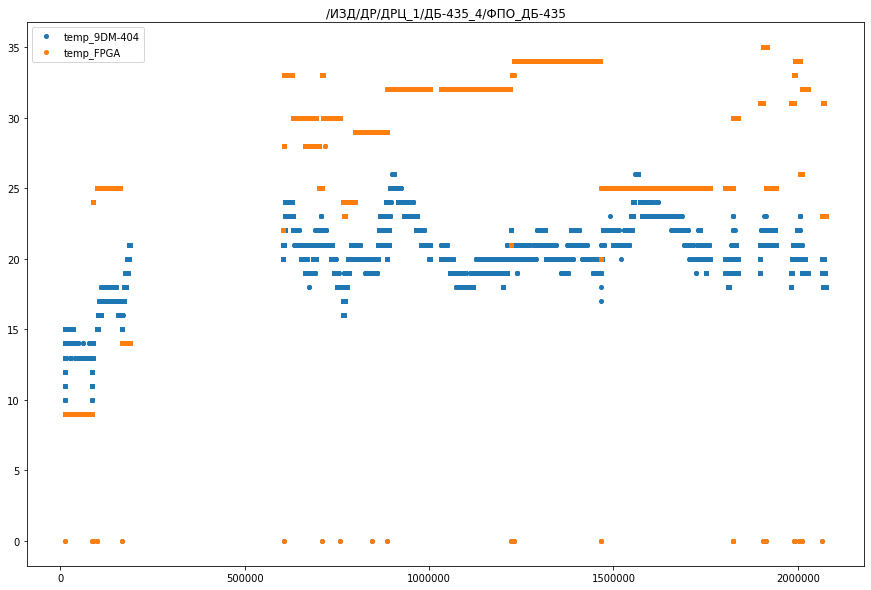

(array([237493.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  40186.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

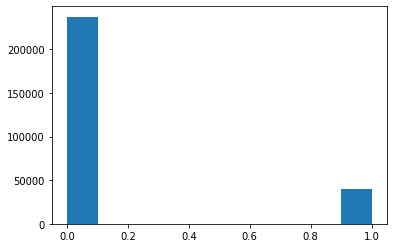

In [79]:
# temperatures of 9DM-404 and ПЛИС 
plt.figure(figsize=(15,10))
plt.plot(block['reg_time'], block['data1'], label='temp_9DM-404', marker='o', linestyle='', markersize=4)
plt.plot(block['reg_time'], block['data5'], label='temp_FPGA', marker='o', linestyle='', markersize=4)
plt.legend(loc='best')
plt.title(name)
# plt.xlim(40000,50000)
plt.show()

plt.hist(block['cmd'])

In [ ]:
# parameters 'is_rab','is_ispr','is_neispr','is_otkaz'
plt.figure(figsize=(21,15))
plt.plot(block['reg_time'], block['is_rab'], label='is_rab', marker='o', linestyle='', markersize=4)
plt.plot(block['reg_time'], block['is_ispr']*2+.1, label='is_ispr', marker='o', linestyle='', markersize=4)
plt.plot(block['reg_time'], block['is_neispr']*3+.2, label='is_neispr', marker='o', linestyle='', markersize=4)
plt.plot(block['reg_time'], block['is_otkaz']*4+.3, label='is_otkaz', marker='o', linestyle='', markersize=4)
plt.legend(loc='best')
plt.show()

Вывод: на 40000, 58000, 63000 секундах наблюдаются:
* отказы для подсистем 1,3,4,14, которые связаны с датчиками температуры и АЦП
* отказы работы датчика температуры ПЛИС
* перевод всего блока в состояние ОТКАЗ

Таким образом, в эти моменты времени отказ блока произошел из-за отключения датчика температуры ПЛИС.

Проблемы:
* есть блоки, о которых нет информации в файле с описанием поля state сообщения МССА2, например

'/ИЗД/ДР/ДРП_2/ДРП-кр/Щит А2/Нагрев/Наработка',

 '/ИЗД/ДР/ДРЦ_1/ДРЦ-кр/УУ-Кр-ДРЦ/КП1/ТС1',
 
 '/ИЗД/ДР/ДРП_3/ДРП-кр/7ДРПП/Потреб(А4) 5-8/KV10',
 
 '/ИЗД/ДР/ДРЦ_2/ДРЦ-кр/УУ-Кр-ДРЦ/КП1/ТС1',
 
 '/ИЗД/ДР/ДРП_2/ДРП-кр/Щит А2/Контроль темп-р/ВК1'